In [2]:
import datetime
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import folium
import matplotlib.dates as mdates

In [3]:
source = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [4]:
source.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.794830e+05,1.791980e+05,1.780270e+05,1.611310e+05,161104.000000,159949.000000,178654.000000,178369.000000,177203.000000,160315.000000,...,116494.000000,114897.000000,75672.000000,136665.000000,174738.000000,150030.000000,6.417000e+03,6417.000000,6417.000000,6417.000000
mean,3.138255e+06,1.240067e+04,1.244133e+04,6.337819e+04,161.277479,162.277787,38933.857532,184.881766,183.906014,572.876335,...,10.645562,32.789931,50.939438,3.068834,73.649250,0.725279,3.937314e+04,9.683505,15.634208,1090.258014
std,1.966404e+07,8.789737e+04,8.633588e+04,3.307117e+05,799.835491,783.224865,72347.299842,913.365771,585.652644,857.178359,...,10.582999,13.527744,31.859625,2.519610,7.450821,0.149738,1.096858e+05,16.057381,29.134669,1545.291650
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.549000e+03,0.000000e+00,6.714000e+00,9.100000e+01,0.000000,0.143000,748.670250,0.000000,1.532000,22.162000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-2.150000e+01,-0.220000,-0.330000,-9.734468
50%,3.374800e+04,7.300000e+01,1.028570e+02,8.930000e+02,1.000000,2.143000,5974.899000,10.647000,19.170000,157.988000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.898800e+03,6.460000,7.420000,548.924627
75%,3.636630e+05,1.047000e+03,1.154642e+03,8.256500e+03,18.000000,19.857000,48578.528500,102.717000,127.918000,819.576000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.674380e+04,14.640000,21.890000,1754.244765
max,5.214749e+08,4.079791e+06,3.437204e+06,6.263967e+06,18151.000000,14795.286000,706541.904000,208049.887000,37617.428000,6385.394000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


# data cleaning

In [5]:
df = source.copy()

In [6]:
df = df.drop(df[df['iso_code'].str.contains("OWID_")].index)

In [7]:
df_timeline = df[['date','total_cases']].groupby(by=["date"], dropna=True).sum()
df_timeline['total_cases'] = df_timeline['total_cases']/1000000000
df_timeline = df_timeline[df_timeline['total_cases']>0]
df_timeline = df_timeline.reset_index()

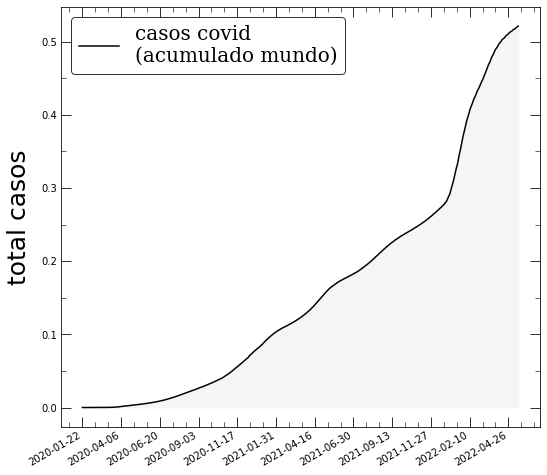

In [8]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_size_inches(8, 7)

plt.plot(df_timeline['date'],df_timeline['total_cases'], color='k', label='casos covid\n(acumulado mundo)')
ax.fill_between(df_timeline['date'], 0, df_timeline['total_cases'], color='whitesmoke')

# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["axes.edgecolor"] = "black"

# plt.xlim(-10, 110)
# plt.ylim(0, 0.3)

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

ax.set_ylabel(r'total casos', labelpad=10, fontsize=25)
# ax.set_xlabel(r'$time$', labelpad=10, fontsize=25)

# X-axis MARKS
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(75))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(25))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))

plt.gcf().autofmt_xdate()
plt.legend( facecolor= 'white', edgecolor = 'black')

# plt.savefig('.\img\img1.png', format='png',transparent=True, dpi=300)
# plt.savefig('.\img\img1.pdf', format='pdf',transparent=True)
plt.show()

# seasonal decomposition

In [9]:
df_seasonal = df_timeline
df_seasonal.index = pd.to_datetime(df_seasonal['date'])
seasonal_res = seasonal_decompose(x=df_seasonal['total_cases'], model ='additive')

In [10]:
# seasonal_res._seasonal.index

C:\Users\costa\AppData\Local\Temp/ipykernel_6756/3148618242.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(labels)


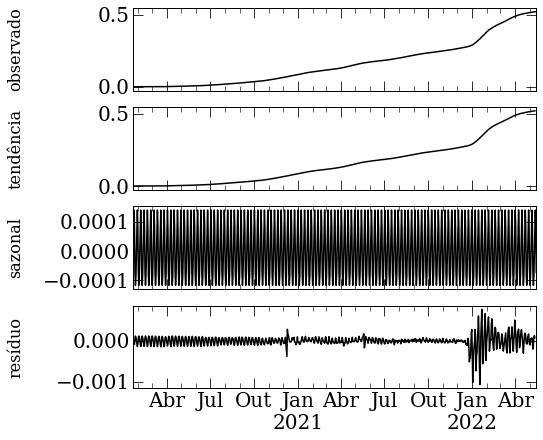

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True)
fig.set_size_inches(8, 7)

seasonal_res.observed.plot(ax=ax[0], legend=False, c='k')
ax[0].set_ylabel('observado', size =16)
ax[0].get_yaxis().set_label_coords(-0.27,0.5)

seasonal_res.trend.plot(ax=ax[1], legend=False, c='k')
ax[1].set_ylabel('tendência', size =16)
ax[1].get_yaxis().set_label_coords(-0.27,0.5)

seasonal_res.seasonal.plot(ax=ax[2], legend=False, c='k')
ax[2].set_ylabel('sazonal', size =16)
ax[2].get_yaxis().set_label_coords(-0.27,0.5)

seasonal_res.resid.plot(ax=ax[3], legend=False, c='k')
ax[3].set_ylabel('resíduo', size =16)
ax[3].get_yaxis().set_label_coords(-0.27,0.5)


ax[0].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[0].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)
ax[1].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[1].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)
ax[2].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[2].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)
ax[3].tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax[3].tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

ax[3].set_xlabel(r'', labelpad=10, fontsize=25)
plt.subplots_adjust(left=0.25,right=0.95)

# plt.draw()
# labels = [item.get_text() for item in ax[3].get_xticklabels()]
# print(labels)
labels = ['', 'Abr', 'Jul', 'Out', 'Jan\n2021', 'Abr', 'Jul', 'Out', 'Jan\n2022', 'Abr', '']
ax[3].set_xticklabels(labels)


# plt.savefig('.\img\img2.png', format='png',transparent=True, dpi=300)
# plt.savefig('.\img\img2.pdf', format='pdf',transparent=True)
plt.show()

In [12]:
threshold = 0.00017
# seasonal_res.resid[seasonal_res.resid>threshold]

In [13]:
# seasonal_res.resid[abs(seasonal_res.resid)>threshold+0.0005]

# Select Dates

In [14]:
startdate = df['date'].min()
break1date = '2020-12-10'
break2date = '2021-05-19'
enddate = '2022-01-02' # << max residue value  
# enddate = df['date'].max()

startdate,break1date,break2date,enddate

('2020-01-01', '2020-12-10', '2021-05-19', '2022-01-02')

C:\Users\costa\AppData\Local\Temp/ipykernel_6756/3739065974.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


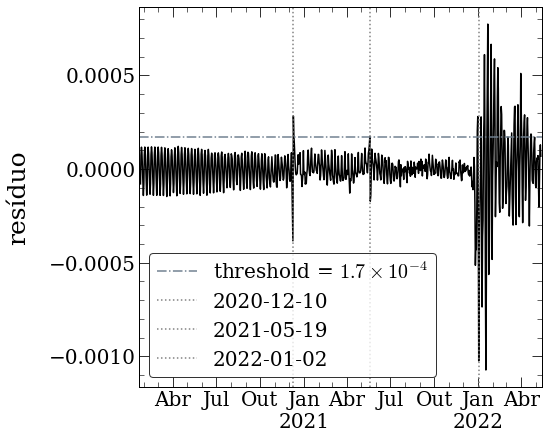

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(8, 7)

seasonal_res.resid.plot(ax=ax, c='k', label='')
ax.set_ylabel('resíduo', size =25)

plt.axhline(y=threshold, color='slategrey', linestyle='-.', label='threshold = $1.7 \\times 10^{-4}$')
plt.axvline(x=break1date, color='gray', linestyle=':', label=break1date)
plt.axvline(x=break2date, color='gray', linestyle=':', label=break2date)
plt.axvline(x=enddate, color='gray', linestyle=':', label=enddate)

ax.get_yaxis().set_label_coords(-0.27,0.5)

ax.set_xlabel(r'', labelpad=10, fontsize=25)

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)

labels = ['', 'Abr', 'Jul', 'Out', 'Jan\n2021', 'Abr', 'Jul', 'Out', 'Jan\n2022', 'Abr', '']
ax.set_xticklabels(labels)


# X-axis MARKS
# ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

# Y-axis MARKS
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.0005))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0001))

plt.legend( facecolor= 'white', edgecolor = 'black')
plt.subplots_adjust(left=0.25,right=0.95)

# plt.savefig('.\img\img3.png', format='png',transparent=True, dpi=300)
# plt.savefig('.\img\img3.pdf', format='pdf',transparent=True)
plt.show()

# define periods

In [16]:
date_period1 = break1date
date_period2 = break2date
date_period3 = enddate

In [17]:
df_period1 = df[df['date'] == date_period1]
df_period2 = df[df['date'] == date_period2]
df_period3 = df[df['date'] == date_period3]

In [18]:
try: 
    df_period1 = df_period1.drop(['iso_code','continent','date','tests_units'], 1)
    df_period2 = df_period2.drop(['iso_code','continent','date','tests_units'], 1)
    df_period3 = df_period3.drop(['iso_code','continent','date','tests_units'], 1)
except:
    pass  

C:\Users\costa\AppData\Local\Temp/ipykernel_6756/4257656434.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_period1 = df_period1.drop(['iso_code','continent','date','tests_units'], 1)
C:\Users\costa\AppData\Local\Temp/ipykernel_6756/4257656434.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_period2 = df_period2.drop(['iso_code','continent','date','tests_units'], 1)
C:\Users\costa\AppData\Local\Temp/ipykernel_6756/4257656434.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_period3 = df_period3.drop(['iso_code','continent','date','tests_units'], 1)


# k-means Model

### normalização

In [19]:
scaler = MinMaxScaler()
df_period1=df_period1.fillna(0) #remove nan
df_period2=df_period2.fillna(0) #remove nan
df_period3=df_period3.fillna(0) #remove nan

df_scaled_period1 = scaler.fit_transform(df_period1.iloc[:,1:].to_numpy()) #scale
df_scaled_period2 = scaler.fit_transform(df_period2.iloc[:,1:].to_numpy()) #scale
df_scaled_period3 = scaler.fit_transform(df_period3.iloc[:,1:].to_numpy()) #scale

In [20]:
df_results1 = pd.DataFrame(df_scaled_period1, columns=list(df_period1.iloc[:,1:].columns))
df_results2 = pd.DataFrame(df_scaled_period2, columns=list(df_period2.iloc[:,1:].columns))
df_results3 = pd.DataFrame(df_scaled_period3, columns=list(df_period3.iloc[:,1:].columns))

df_results1.insert(0, "location", list(df_period1['location']), False)
df_results2.insert(0, "location", list(df_period2['location']), False)
df_results3.insert(0, "location", list(df_period3['location']), False)

In [21]:
df_results1.insert(0, "iso_code", list(df[df['date'] == date_period1]['iso_code']), False)
df_results2.insert(0, "iso_code", list(df[df['date'] == date_period2]['iso_code']), False)
df_results3.insert(0, "iso_code", list(df[df['date'] == date_period3]['iso_code']), False)

### PCA analysis

In [22]:
pca1 = PCA(n_components = 10)
pca2 = PCA(n_components = 10)
pca3 = PCA(n_components = 10)

cols1 = df_results1.columns[2:]
cols2 = df_results2.columns[2:]
cols3 = df_results3.columns[2:]

In [23]:
df_results1.insert(3, "x_pca", pca1.fit_transform(df_results1[cols1])[:,0], False)
df_results1.insert(4, "y_pca", pca1.fit_transform(df_results1[cols1])[:,1], False)

df_results2.insert(3, "x_pca", pca2.fit_transform(df_results2[cols2])[:,0], False)
df_results2.insert(4, "y_pca", pca2.fit_transform(df_results2[cols2])[:,1], False)

df_results3.insert(3, "x_pca", pca3.fit_transform(df_results3[cols3])[:,0], False)
df_results3.insert(4, "y_pca", pca3.fit_transform(df_results3[cols3])[:,1], False)

In [24]:
barplot = (pca1.explained_variance_ratio_ + pca2.explained_variance_ratio_ + pca3.explained_variance_ratio_)/3
cum_sum_eigenvalues = np.cumsum(barplot)

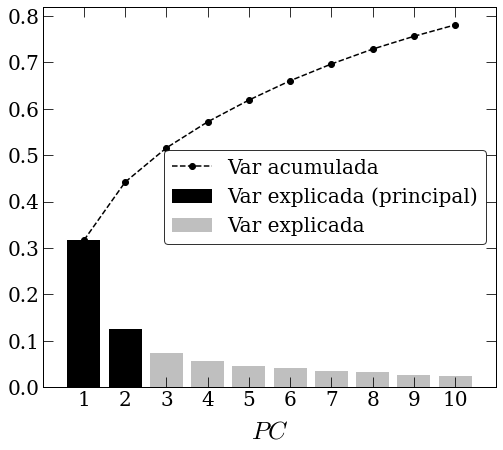

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(9, 7)


ax.bar(['1','2'],barplot[0:2], color = 'black',label='Var explicada (principal)',alpha=1)
ax.bar(['3','4','5','6','7','8','9','10'],barplot[2:10], color = 'gray',label='Var explicada',alpha=0.5)

ax.plot(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 'ko--',label='Var acumulada')
# ax.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, c='gray', where='mid', label='Cumulative var')

ax.tick_params(which='major',bottom=True, top=True, left=True, right=True, direction = 'in', length=10)
ax.tick_params(which='minor',bottom=True, top=True, left=True, right=True, direction = 'in', length=5)


# X-axis MARKS
# ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))

# Y-axis MARKS
# ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.0005))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.0001))

ax.set_xlabel(r'$PC$', labelpad=10, fontsize=25)
# ax.set_ylabel(r'%', labelpad=10, fontsize=25)

plt.legend( facecolor= 'white', edgecolor = 'black')
plt.subplots_adjust(left=0.25,right=0.95)

plt.xlim(-1, 10)
# plt.ylim(0, 0.3)

# plt.savefig('.\img\img4.png', format='png',transparent=True, dpi=300)
# plt.savefig('.\img\img4.pdf', format='pdf',transparent=True)
plt.show()

# k-means Model

In [26]:
# df_results1.iloc[:,2:]

### choose only one!!!

### a) k-means using data + PC1 and PC2

In [27]:
cluster_var = 3
kmeans = KMeans(n_clusters=cluster_var)

kmeansfit1 = kmeans.fit(df_results1.iloc[:,2:])
kmeansfit2 = kmeans.fit(df_results2.iloc[:,2:])
kmeansfit3 = kmeans.fit(df_results3.iloc[:,2:])

kmeans_predict1 = kmeansfit1.predict(df_results1.iloc[:,2:])
kmeans_predict2 = kmeansfit2.predict(df_results2.iloc[:,2:])
kmeans_predict3 = kmeansfit3.predict(df_results3.iloc[:,2:])

df_results1.insert(1, "kmeans", kmeans_predict1, False)
df_results2.insert(1, "kmeans", kmeans_predict2, False)
df_results3.insert(1, "kmeans", kmeans_predict3, False)

### b) another way...  (k-means using PCA)

In [28]:
# cluster_var = 3
# kmeans = KMeans(n_clusters=cluster_var)

# kmeansfit1 = kmeans.fit(pca1.fit_transform(df_results1[cols1]))
# kmeansfit2 = kmeans.fit(pca2.fit_transform(df_results2[cols2]))
# kmeansfit3 = kmeans.fit(pca3.fit_transform(df_results3[cols3]))

# kmeans_predict1 = kmeansfit1.predict(pca1.fit_transform(df_results1[cols1]))
# kmeans_predict2 = kmeansfit2.predict(pca2.fit_transform(df_results2[cols2]))
# kmeans_predict3 = kmeansfit3.predict(pca3.fit_transform(df_results3[cols3]))

# df_results1.insert(1, "kmeans", kmeans_predict1, False)
# df_results2.insert(1, "kmeans", kmeans_predict2, False)
# df_results3.insert(1, "kmeans", kmeans_predict3, False)

### rearange

### check values

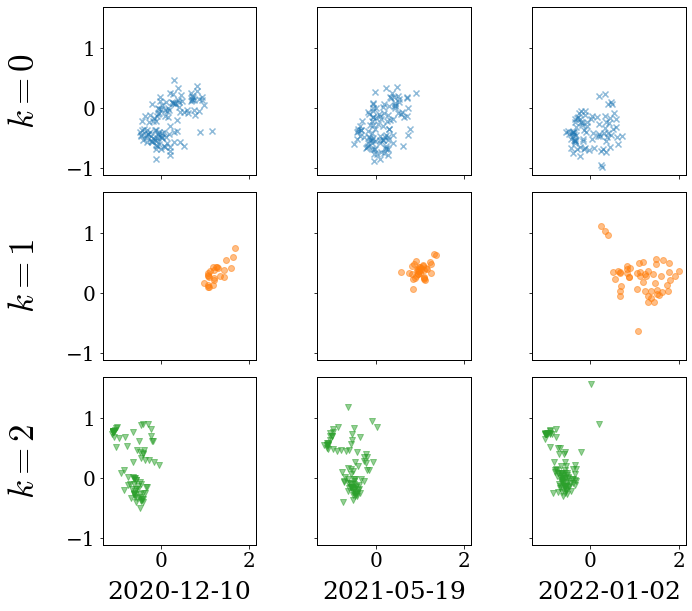

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=3, sharex=True , sharey=True)
fig.set_size_inches(10, 9)
plt.subplots_adjust(top = 0.7, bottom=0.01, hspace=0.1, wspace=0.4)

mark = ['x','o', 'v']
color = ['tab:blue','tab:orange', 'tab:green']

for val in range (cluster_var):
#     val=0
    x1 = df_results1[df_results1['kmeans'] == val]['x_pca']
    y1 = df_results1[df_results1['kmeans'] == val]['y_pca']

    
    x2 = df_results2[df_results2['kmeans'] == val]['x_pca']
    y2 = df_results2[df_results2['kmeans'] == val]['y_pca']

    x3 = df_results3[df_results3['kmeans'] == val]['x_pca']
    y3 = df_results3[df_results3['kmeans'] == val]['y_pca']

    ax[val][0].scatter(x1,y1,alpha=0.5,c=color[val], marker=mark[val])
    ax[val][1].scatter(x2,y2,alpha=0.5,c=color[val], marker=mark[val])
    ax[val][2].scatter(x3,y3,alpha=0.5,c=color[val], marker=mark[val])


ax[0][0].set_ylabel(r'$k = 0$', labelpad=10, fontsize=35)
ax[1][0].set_ylabel(r'$k = 1$', labelpad=10, fontsize=35)
ax[2][0].set_ylabel(r'$k = 2$', labelpad=10, fontsize=35)

ax[0][0].get_yaxis().set_label_coords(-0.4,0.5)
ax[1][0].get_yaxis().set_label_coords(-0.4,0.5)
ax[2][0].get_yaxis().set_label_coords(-0.4,0.5)

ax[2][0].set_xlabel(break1date, labelpad=10, fontsize=25)
ax[2][1].set_xlabel(break2date, labelpad=10, fontsize=25)
ax[2][2].set_xlabel(enddate, labelpad=10, fontsize=25)


plt.subplots_adjust(left=0.15,right=0.96, bottom = 0.12,top=0.95)
# plt.savefig('.\img\img5.png', format='png',transparent=True, dpi=300)
# plt.savefig('.\img\img5.pdf', format='pdf',transparent=True)
plt.show()

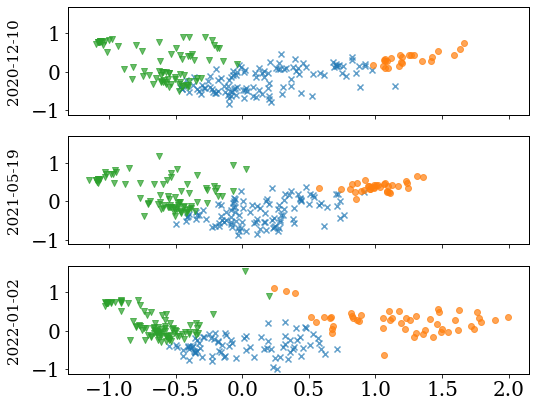

In [30]:
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True , sharey=True)
fig.set_size_inches(8, 6)

mark = ['x','o', 'v']
color = ['tab:blue','tab:orange', 'tab:green']

for val in range (cluster_var):
    x1 = df_results1[df_results1['kmeans'] == val]['x_pca']
    y1 = df_results1[df_results1['kmeans'] == val]['y_pca']
    
    x2 = df_results2[df_results2['kmeans'] == val]['x_pca']
    y2 = df_results2[df_results2['kmeans'] == val]['y_pca']

    x3 = df_results3[df_results3['kmeans'] == val]['x_pca']
    y3 = df_results3[df_results3['kmeans'] == val]['y_pca']

    ax[0].scatter(x1,y1,alpha=0.7,c = color[val], marker=mark[val])
    ax[1].scatter(x2,y2,alpha=0.7,c = color[val], marker=mark[val])
    ax[2].scatter(x3,y3,alpha=0.7,c = color[val], marker=mark[val])
    
#     ax[0].scatter(x1,y1,alpha=0.7, marker=mark[val])
#     ax[1].scatter(x2,y2,alpha=0.7, marker=mark[val])
#     ax[2].scatter(x3,y3,alpha=0.7, marker=mark[val])
    
ax[0].set_ylabel(break1date, labelpad=10, fontsize=15)
ax[1].set_ylabel(break2date, labelpad=10, fontsize=15)
ax[2].set_ylabel(enddate, labelpad=10, fontsize=15)
plt.subplots_adjust(left=0.15,right=0.95, bottom = 0.10,top=0.95)

# plt.savefig('.\img\img6.png', format='png',transparent=True, dpi=300)
# plt.savefig('.\img\img6.pdf', format='pdf',transparent=True)
plt.show()

# Save data

In [31]:
df_final_1 = pd.DataFrame()
df_final_2 = pd.DataFrame()
df_final_3 = pd.DataFrame()

In [32]:
df_final_1['Period'] = datetime.datetime.strptime(break1date, '%Y-%m-%d').strftime('%Y-%b-%d')
df_final_1['Country'] = df_results1['iso_code']
df_final_1['kmeans'] = df_results1['kmeans']
df_final_1['Period'] = datetime.datetime.strptime(break1date, '%Y-%m-%d').strftime('%Y-%b-%d')

df_final_2['Period'] = datetime.datetime.strptime(break2date, '%Y-%m-%d').strftime('%Y-%b-%d')
df_final_2['Country'] = df_results2['iso_code']
df_final_2['kmeans'] = df_results2['kmeans']
df_final_2['Period'] = datetime.datetime.strptime(break2date, '%Y-%m-%d').strftime('%Y-%b-%d')

df_final_3['Period'] = datetime.datetime.strptime(enddate, '%Y-%m-%d').strftime('%Y-%b-%d')
df_final_3['Country'] = df_results3['iso_code']
df_final_3['kmeans'] = df_results3['kmeans']
df_final_3['Period'] = datetime.datetime.strptime(enddate, '%Y-%m-%d').strftime('%Y-%b-%d')

In [33]:
df_final = pd.concat([df_final_1, df_final_2,df_final_3], axis=0)

In [34]:
df_final.to_csv('./webserver/kmeans-by-country.csv', index=False )

# Conclusion

In [35]:
conlusion = pd.read_csv('./webserver/kmeans-by-country.csv')

In [36]:
# conlusion[conlusion["Country"] == 'DEU'].T
# conlusion[conlusion["Country"] == 'BRA'].T.iloc[2,2]
# conlusion["Period"].unique()

In [38]:
testdf = pd.DataFrame(data={
  'Country': [],  
  str(conlusion["Period"].unique()[0]): [],
    str(conlusion["Period"].unique()[1]): [],
    str(conlusion["Period"].unique()[2]): []
})

countryilst = ['BRA','RUS','IND','CHN','ZAF','CAN','FRA','DEU','ITA','JPN','GBR','USA']
for val in countryilst:
#     print(conlusion[conlusion["Country"] == val].T.iloc[2,0])
    testdf = testdf.append(
        {
          'Country': val,  
          str(conlusion["Period"].unique()[0]): conlusion[conlusion["Country"] == val].T.iloc[2,0],
          str(conlusion["Period"].unique()[1]): conlusion[conlusion["Country"] == val].T.iloc[2,1],
          str(conlusion["Period"].unique()[2]): conlusion[conlusion["Country"] == val].T.iloc[2,2]
        }, ignore_index=True)

In [39]:
testdf

,Country,2020-Dec-10,2021-May-19,2022-Jan-02
0,BRA,0.0,0.0,1.0
1,RUS,0.0,0.0,0.0
2,IND,0.0,0.0,0.0
3,CHN,0.0,0.0,0.0
4,ZAF,0.0,0.0,0.0
5,CAN,0.0,1.0,1.0
6,FRA,1.0,1.0,1.0
7,DEU,1.0,1.0,1.0
8,ITA,1.0,1.0,1.0
9,JPN,0.0,1.0,0.0


In [373]:
testdf

,Country,2020-Dec-10,2021-May-19,2022-Jan-02
0,BRA,0.0,0.0,1.0
1,RUS,0.0,0.0,0.0
2,IND,0.0,0.0,0.0
3,CHN,0.0,0.0,0.0
4,ZAF,0.0,0.0,0.0
5,CAN,0.0,1.0,1.0
6,FRA,1.0,1.0,1.0
7,DEU,1.0,1.0,1.0
8,ITA,1.0,1.0,1.0
9,JPN,0.0,1.0,0.0


# Choropleth Maps 

https://costargc.github.io/MBA-USP-TCC/choropleth.html

# Brazil Analysis (comparison)

In [ ]:
print(pd.concat([
df_results1[df_results1['location'] == 'Brazil'],
df_results2[df_results2['location'] == 'Brazil'],
df_results3[df_results3['location'] == 'Brazil']
]).T.to_string())

In [ ]:
print(pd.concat([
df_results1[df_results1['location'] == 'China'],
df_results2[df_results2['location'] == 'China'],
df_results3[df_results3['location'] == 'China']
]).T.to_string())

In [ ]:
print(pd.concat([
df_results1[df_results1['location'] == 'United States'],
df_results2[df_results2['location'] == 'United States'],
df_results3[df_results3['location'] == 'United States']
]).T.to_string())

In [ ]:
print(pd.concat([
df_results1[df_results1['location'] == 'South Africa'],
df_results2[df_results2['location'] == 'South Africa'],
df_results3[df_results3['location'] == 'South Africa']
]).T.to_string())